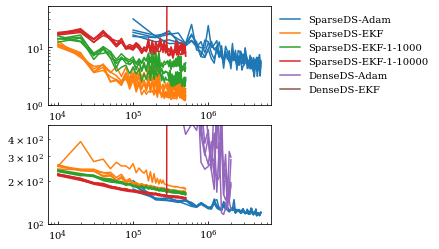

In [39]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

for name, tag in [
    ('pils-v2-*-adam-v2', 'SparseDS-Adam'),
    ('pils-v2-*-ekf-v3', 'SparseDS-EKF'),
    ('pils-v2-*-ekf-v4', 'SparseDS-EKF-1-1000'),
    ('pils-v2-*-ekf-v5', 'SparseDS-EKF-1-10000'),
    ('pils-v3-*-adam-v2', 'DenseDS-Adam'),
    ('pils-v3-*-ekf-v3', 'DenseDS-EKF'),
]:
    logs = glob(f'../models/{name}-*/pinn.log')
    color = next(ax1._get_lines.prop_cycler)['color']
    for log in logs:
        step, e_err, _, f_err = np.loadtxt(log).T
        ax1.plot(step, e_err*1e3, label=tag, color=color)
        ax2.plot(step, f_err*1e3, label=tag, color=color)
        
        

ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax1.set_ylim([1,50])
ax2.set_ylim([100,500])

unique_legend(ax1, bbox_to_anchor=[1,1], loc=2)

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

def unique_legend(ax, **kwargs):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), **kwargs)